In [14]:
#get dependencies
import seaborn as sns
import time
from itertools import combinations 
import matplotlib.pyplot as plt
%matplotlib inline 
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import roc_curve, auc
import pandas as pd 
import numpy as np
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.naive_bayes import MultinomialNB
import os
from numpy import array
from scipy.sparse import csr_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics 
from sklearn.model_selection import KFold
#load the dataframe
all_state = pd.read_csv("allstate_sample.csv")
import random
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler  
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.metrics import accuracy_score

(10357, 133)


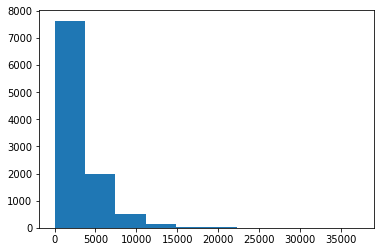

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,A,A,A,A,B,A,A,A,A,A,...,0.490651,0.992293,0.33372,0.42289,0.60401,0.797841,0.785706,0.189489,0.798932,1496.42
1,A,B,A,B,A,A,A,A,B,A,...,0.186254,0.317274,0.27797,0.32128,0.24355,0.180456,0.178698,0.304350,0.383475,3631.23
2,A,B,A,B,A,A,A,A,B,A,...,0.367193,0.266569,0.60087,0.58529,0.20496,0.254180,0.250169,0.509999,0.740503,1599.79
3,A,B,A,A,A,A,A,A,B,B,...,0.350956,0.363768,0.58354,0.44352,0.39599,0.341813,0.352251,0.339244,0.236627,9270.33
4,A,B,A,A,A,A,A,A,A,A,...,0.763644,0.646277,0.25918,0.49790,0.61459,0.614915,0.601984,0.808455,0.221004,2790.16


In [2]:
print(all_state.shape)
#show distribution of lost 
plt.hist(all_state['loss'])
plt.show()
#distribution is right skewwed, not normal
#does not matter with naive bayes
all_state.dtypes
#only cat1 through cat116 are type object
#drop unamed:0 and id
all_state = all_state.drop(['Unnamed: 0','id'],axis=1)
all_state.head()


In [3]:
all_state.iloc[:,115]
#create range from 0 to 115 for chosing categorial variables
#how should you bin the responses though..?
#im going to start with a binary classifier first
#make function to bin, might need this later
def bin_loss_all_state(df,col_to_cut,col_name,ranges,labels):
    df[col_name] = pd.cut(df[col_to_cut],ranges,labels = labels)
    response = df[col_name]
    return(response) 

In [4]:
#create a binary response to test
all_state["BinLoss1"] = pd.cut(all_state['loss'], [0,2000,100000], labels = ["Low", "High"])
all_state.head()

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,...,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss,BinLoss1
0,A,A,A,A,B,A,A,A,A,A,...,0.992293,0.33372,0.42289,0.60401,0.797841,0.785706,0.189489,0.798932,1496.42,Low
1,A,B,A,B,A,A,A,A,B,A,...,0.317274,0.27797,0.32128,0.24355,0.180456,0.178698,0.304350,0.383475,3631.23,High
2,A,B,A,B,A,A,A,A,B,A,...,0.266569,0.60087,0.58529,0.20496,0.254180,0.250169,0.509999,0.740503,1599.79,Low
3,A,B,A,A,A,A,A,A,B,B,...,0.363768,0.58354,0.44352,0.39599,0.341813,0.352251,0.339244,0.236627,9270.33,High
4,A,B,A,A,A,A,A,A,A,A,...,0.646277,0.25918,0.49790,0.61459,0.614915,0.601984,0.808455,0.221004,2790.16,High


In [5]:
#try taking the log off loss and see what happens too
all_state['log_loss'] = np.log(all_state['loss'])
all_state['log_loss'].describe()
#try binning log_loss
all_state["BinLogLoss"] = pd.cut(all_state['log_loss'], [0,8,10.6], labels = ["Low", "High"])
all_state['BinLogLoss'].value_counts()

Low     6724
High    3633
Name: BinLogLoss, dtype: int64

In [6]:
all_state_models = pd.read_csv("all_state_models_NB.csv")
all_state_models.head()

,Unnamed: 0,iteration_number,num_variables,selection_variables,upper_bound_low_cat,accuracy_scores,misclass_scores
0,0,0,5,"[13, 28, 20, 11, 17]",6.2,0.977117,0.022883
1,1,0,5,"[13, 28, 20, 11, 17]",6.4,0.951917,0.048083
2,2,0,5,"[13, 28, 20, 11, 17]",6.6,0.909530,0.090470
3,3,0,5,"[13, 28, 20, 11, 17]",6.8,0.855267,0.144733
4,4,0,5,"[13, 28, 20, 11, 17]",7.0,0.784107,0.215893


In [7]:
#get distributions for logloss at 7.8
#try taking the log off loss and see what happens too
all_state['log_loss'] = np.log(all_state['loss'])
all_state['log_loss'].describe()
#try binning log_loss
all_state["BinLogLoss"] = pd.cut(all_state['log_loss'], [0,7.8,10.6], labels = ["Low", "High"])
all_state['BinLogLoss'].value_counts()
#low bin log loss will 7.8

Low     5896
High    4461
Name: BinLogLoss, dtype: int64

In [8]:
#for naive bayes, already said 30 vars and cut off for logloss low at 7.8 
low_interval = [0,7.8,12]
#create new binned response
response_1 = bin_loss_all_state(all_state,'log_loss','BinLogLoss',low_interval,["Low", "High"])
accuracy_30_values = []
misclass_30_values = []
selection_variables =[]
for i in range(1,500):
    #get random sample of 30 predictors
    selection = list(np.random.choice(range(1,116),size=30,replace=False))
    selection_variables.append(selection)
    #get the design matrix 
    X = all_state.iloc[:,selection]
    #encode the cateogorival variables
    encoder = preprocessing.OneHotEncoder()
    encoder.fit(X)
    X_encoded = encoder.transform(X) ##this is not an array yet
    #fit the classifier
    clf = MultinomialNB()
    clf.fit(X_encoded.toarray(),response_1)
    #predict and get accuracy
    predictions = clf.predict(X_encoded.toarray())
    #get accuracy rate
    accuracy_30 = np.mean(predictions == response_1)
    misclass_30 = np.mean(predictions != response_1)
    #add to list
    accuracy_30_values.append(accuracy_30)
    misclass_30_values.append(misclass_30_values)
plt.hist(accuracy_30_values)
plt.show()

In [10]:
#identifiy selection of features that give the highest accuracy, given the reponse
optimized_features = selection_variables[np.argmax(accuracy_30_values)]
#allocate matrices
encoder = preprocessing.OneHotEncoder()
encoder.fit(all_state.iloc[:,optimized_features])
X_optimized_encoded = encoder.transform(all_state.iloc[:,optimized_features]) #this is not an array yet
#cast X_optimized_encoded as array
X = X_optimized_encoded.toarray()
y = response_1
#begin CV
cv = KFold(n_splits=10, random_state=45, shuffle=False)
cv_accuracy_scores = []
cv_misclass_scores = []
for train_index, test_index in cv.split(X):
    #assign training and testing matrices
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y.iloc[train_index], y.iloc[test_index]
    #fit the classifier
    clf = MultinomialNB()
    clf.fit(X_train,y_train)
    #predict and get accuracy
    cv_predictions = clf.predict(X_test)
    #get accuracy rate
    cv_accuracy_38 = np.mean(cv_predictions == y_test)
    cv_misclass_38 = np.mean(cv_predictions != y_test)
    #add
    cv_accuracy_scores.append(cv_accuracy_38)
    cv_misclass_scores.append(cv_misclass_38)
print(cv_accuracy_scores)
print(np.mean(cv_accuracy_scores))

[0.750965250965251, 0.7171814671814671, 0.7393822393822393, 0.7335907335907336, 0.747104247104247, 0.7393822393822393, 0.7480694980694981, 0.7410628019323672, 0.7613526570048309, 0.7623188405797101]
0.7440409975192583


In [17]:
#using optimized features get predictions, remember this is from the whole set
clf_NB = MultinomialNB()
clf_NB.fit(X,y)
predictions_NB = clf_NB.predict(X)
accuracy_score(predictions_NB,y)

0.7529207299411026

In [20]:
#now knn
#use continuous features from all state
all_state.head()
cont_variables = [vars for vars in all_state.columns if 'cont' in vars]
cont_variables
#lets try a first stab at knn using all 14
#but first we need to standardize the cont variables
all_state_cont = all_state[cont_variables]
scaler = StandardScaler()  
scaler.fit(all_state_cont)
all_state_cont_scaled = scaler.transform(all_state_cont)
#plt.hist(all_state_cont_scaled[:,3])
#plt.show()
all_state_models_knn = pd.read_csv("all_state_models_knn.csv")
all_state_models_knn.head()
#we already said 3 neighbors and 5 of the continuous variables


,Unnamed: 0,num_variables,selected_variables,model_number,num_neighbors,accuracy_knn
0,0,1,[13],1,2,0.709182
1,1,1,[8],1,3,0.556918
2,2,1,[4],1,4,0.499372
3,3,1,[5],1,5,0.605291
4,4,1,[9],2,2,0.475910


In [21]:
#write knn function that takes in design matrix and response, the num neighbors and the
#minkowski distance parameter and returns accuracy
def knn(X,y,n,p):
    #fit the classifier
    classifier = KNeighborsClassifier(n_neighbors=n, weights = 'uniform', algorithm = 'kd_tree',p=p)  
    classifier.fit(X, y)
    y_pred = classifier.predict(X)
    return(accuracy_score(y_pred,y))
#test function
print(knn(all_state_cont_scaled,response_1,5,3))
#function works

0.7045476489330887


In [31]:
#lets estimate the distribution of all 5 feature knn models with num neighbors equal to 3, do 1000 times
#can alter to try 14
accuracy_knn_5cont_3neigh = []
variables = []
for i in range(0,700):
    if i%50 == 0:
        print(i,time.ctime())
    #store random seletion of variables
    selection = np.random.choice(range(0,all_state_cont_scaled.shape[1]),size=14,replace=False)
    #get variables from standard
    X = all_state_cont_scaled[:,selection]
    y = response_1
    #get accuracy, use squared distance
    accuracy = knn(X,y,3,2)
    #store values
    accuracy_knn_5cont_3neigh.append(accuracy)
    variables.append(selection)

0 Mon Sep 16 23:53:34 2019
50 Mon Sep 16 23:53:53 2019
100 Mon Sep 16 23:54:13 2019
150 Mon Sep 16 23:54:32 2019
200 Mon Sep 16 23:54:51 2019
250 Mon Sep 16 23:55:12 2019
300 Mon Sep 16 23:55:33 2019
350 Mon Sep 16 23:55:54 2019
400 Mon Sep 16 23:56:16 2019
450 Mon Sep 16 23:56:38 2019
500 Mon Sep 16 23:56:58 2019
550 Mon Sep 16 23:57:18 2019
600 Mon Sep 16 23:57:37 2019
650 Mon Sep 16 23:57:57 2019


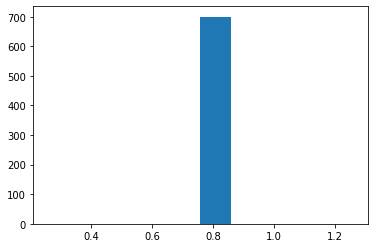

0.7584242541276431


In [32]:
plt.hist(accuracy_knn_5cont_3neigh)
plt.show()
print(np.max(accuracy_knn_5cont_3neigh))

In [33]:
#cross validatidate with the best model
#num features 5, neighbors 3
#get best features
optimized_features = variables[np.argmax(accuracy_knn_5cont_3neigh)]
#allocate matrices
X = all_state_cont_scaled[:,optimized_features]
y = response_1

#begin CV
cv = KFold(n_splits=10, random_state=45, shuffle=False)
cv_accuracy_scores = []
cv_misclass_scores = []
for train_index, test_index in cv.split(X):
    #assign training and testing matrices
    X_train, X_test, y_train, y_test = X[train_index], X[test_index], y.iloc[train_index], y.iloc[test_index]
    #fit the classifier
    knn_clf_cv = KNeighborsClassifier(n_neighbors=3,p=2)
    knn_clf_cv.fit(X_train,y_train)
    #predict and get accuracy
    cv_predictions = knn_clf_cv.predict(X_test)
    #get accuracy rate
    cv_accuracy = np.mean(cv_predictions == y_test)
    cv_misclass = np.mean(cv_predictions != y_test)
    #add
    cv_accuracy_scores.append(cv_accuracy)
    cv_misclass_scores.append(cv_misclass)
    
print(cv_accuracy_scores)
print(np.mean(cv_accuracy_scores))

[0.555019305019305, 0.5144787644787645, 0.525096525096525, 0.5212355212355212, 0.5521235521235521, 0.5598455598455598, 0.5115830115830116, 0.5285024154589372, 0.5285024154589372, 0.5256038647342995]
0.5321990935034413


missclassification rate is 26.455537317756107


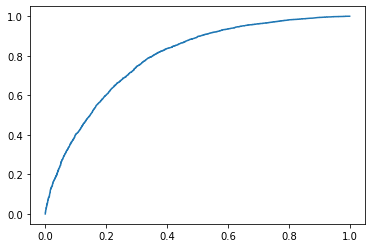

In [50]:
#genearte ROC curve for naive bayes
#identifiy selection of features that give the highest accuracy, given the reponse
optimized_features = selection_variables[np.argmax(accuracy_30_values)]
#allocate matrices
encoder = preprocessing.OneHotEncoder()
encoder.fit(all_state.iloc[:,optimized_features])
X_optimized_encoded = encoder.transform(all_state.iloc[:,optimized_features]) #this is not an array yet
#cast X_optimized_encoded as array
X = X_optimized_encoded.toarray()
y = response_1
#convert y to binary
def binarize_y(a):
    if a == "High":
        return(0)
    else:
        return(1)
y_binary = y.apply(binarize_y)
#genearte ROC curve for naive bayes
#fit the classifier
clf = MultinomialNB()
clf.fit(X,y_binary)
#get predictions, prior is set to 50%
print("missclassification rate is "+str((sum(clf.predict(X) != y_binary) / len(y_binary))*100))
#Print confusion matrix
pd.crosstab(y_binary,clf.predict(X))
#generate roc curver for multinomalNB
thresholds = np.linspace(0,1,15)
fpr_MNB, tpr_MNB, thresholds = roc_curve(y_binary, clf.predict_proba(X)[:,1])
plt.plot(fpr_MNB,tpr_MNB)
plt.show()

In [53]:
#get predictions from NB
predictions_NB
#get pridctions from knn
knn = KNeighborsClassifier(n_neighbors=3,p=2)
knn.fit(all_state_cont_scaled,response_1)
knn_predictions = knn.predict(all_state_cont_scaled)
accuracy_score(knn_predictions,response_1)



0.7584242541276431

In [61]:
#binaryize both
predictions_NB_bin = pd.Series(predictions_NB).apply(binarize_y)
knn_predictions_bin = pd.Series(knn_predictions).apply(binarize_y)
actual_y = response_1.apply(binarize_y)

In [93]:
#turn to arrays and concatnnate
X = np.hstack((predictions_NB_bin.values.reshape((10357,1)),
                   knn_predictions_bin.values.reshape((10357,1))))
X.shape

#the matrix equation now reads vec_y = A*vec_X
u, s, vh = np.linalg.svd(X, full_matrices=True)

In [126]:
from sklearn.ensemble import VotingClassifier
clf1 = KNeighborsClassifier(n_neighbors=2,p=2)
clf2 = MultinomialNB()
ensemble=VotingClassifier(estimators=[('knn',clf1 ), ('NB', clf2)], 
                       voting='hard', weights=[1,1]).fit(X,actual_y)
print('The accuracy for knn and multinb is:',ensemble.score(X,actual_y))

The accuracy for knn and multinb is: 0.7529207299411026


In [108]:
np.matmul(X,s)

array([106.50412221,  42.33050853, 148.83463074, ...,  42.33050853,
        42.33050853,  42.33050853])